In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [80]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [81]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [82]:
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [83]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [84]:
X = df.drop('MEDV', axis = 1)
Y = df['MEDV']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [88]:
model = Sequential()
model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 568.8823 - mae: 22.1669 - val_loss: 530.6727 - val_mae: 21.4570
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 586.8296 - mae: 22.3070 - val_loss: 496.9152 - val_mae: 20.6262
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 545.6505 - mae: 21.1742 - val_loss: 461.0598 - val_mae: 19.7095
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 500.5203 - mae: 20.2757 - val_loss: 419.3476 - val_mae: 18.6072
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 437.0957 - mae: 18.4701 - val_loss: 367.3795 - val_mae: 17.1942
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 397.1504 - mae: 17.2429 - val_loss: 306.2538 - val_mae: 15.5172
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 324.7567 - mae: 15.4818 - val_loss: 240.4047 - val_mae: 13.5507
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 276.9807 - mae: 14.1084 - val_loss: 176.8012 - val_mae: 11.3313
Epoch 9/100
11/1

In [90]:
loss, mae = model.evaluate(X_test, Y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6702 - mae: 2.1883  
Mean Absolute Error on Test Set: 2.377941846847534


In [91]:
Y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


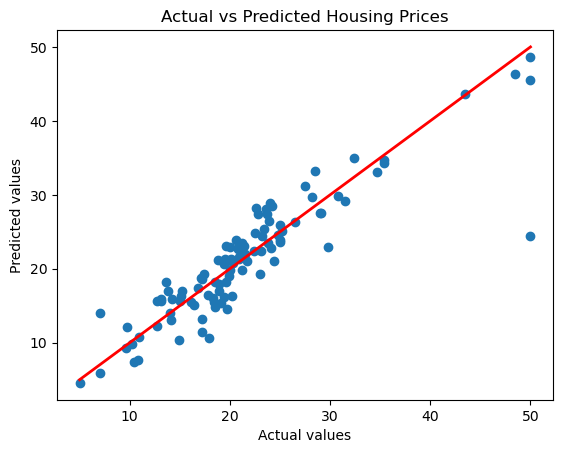

In [92]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Housing Prices')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color = 'red', linewidth = 2)
plt.show()

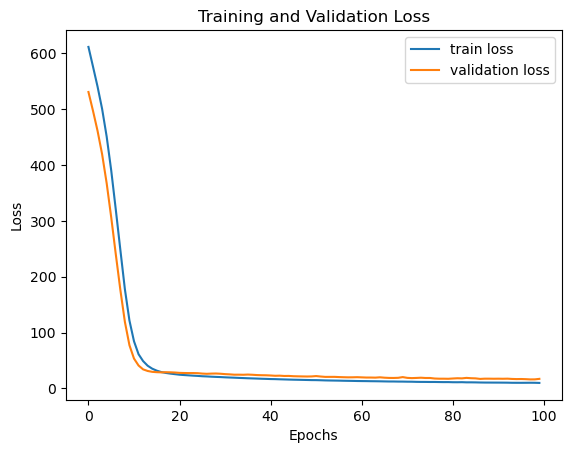

In [93]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()